In [1]:
from pydriller import Repository
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
repositorio = "https://github.com/emberjs/ember.js.git"

In [3]:
commits = []

for commit in Repository(repositorio).traverse_commits():
    record = {
        'hash': commit.hash,
        'message': commit.msg,
        'author_name': commit.author.name,
        'author_email': commit.author.email,
        'author_date': commit.author_date,
        'committer_name': commit.committer.name,
        'committer_email': commit.committer.email,
        'committer_date': commit.committer_date,
       
            }
    commits.append(record)

# Save it to FileCommits.csv
df_commits = pd.DataFrame(commits)

In [4]:
df_commits.to_csv('DF Commits EmberJs.csv', index=False)

In [2]:
df_commits = pd.read_csv("DF Commits EmberJs.csv")

In [3]:
df_commits

,hash,message,author_name,author_email,author_date,committer_name,committer_email,committer_date
0,24f801c64e57dad499a5659b2efcac363e6ade86,first commit,tomhuda,tomhuda@strobecorp.com,2011-04-30 13:24:11-07:00,tomhuda,tomhuda@strobecorp.com,2011-04-30 13:24:11-07:00
1,7aaccb4cf0abb7762b63fcffe93a1ad7286b7e48,Initial commit. Import runtime into SproutCore...,tomhuda,tomhuda@strobecorp.com,2011-04-30 15:39:07-07:00,tomhuda,tomhuda@strobecorp.com,2011-04-30 21:05:01-07:00
2,07de0bf319a305d1f79a81b00000877c2397743a,Remove the large SC.Error class and replace it...,tomhuda,tomhuda@strobecorp.com,2011-04-30 22:23:23-07:00,tomhuda,tomhuda@strobecorp.com,2011-04-30 22:23:23-07:00
3,077e05a1c74457e1021c3ce0cd430cfc970e70c9,Clean up and de-lint Array and Enumerable,tomhuda,tomhuda@strobecorp.com,2011-05-01 00:01:02-07:00,tomhuda,tomhuda@strobecorp.com,2011-05-01 00:01:02-07:00
4,6114278d3a86d24ad004971a6db5fa3c5e8d8ea1,de-lint Freezable,tomhuda,tomhuda@strobecorp.com,2011-05-01 00:04:10-07:00,tomhuda,tomhuda@strobecorp.com,2011-05-01 00:04:10-07:00
...,...,...,...,...,...,...,...,...
22642,f9f9099c066ebe305d4e385da0fcb2abe9928290,Add v5.12.0-beta.3 to CHANGELOG for `ember-sou...,Katie Gengler,katie@kmg.io,2024-09-23 14:36:34-04:00,Katie Gengler,katie@kmg.io,2024-09-23 14:43:59-04:00
22643,1322efb1062397f49bf8bd3d698e19ef7aa6bc9d,Add v5.11.1 to CHANGELOG for `ember-source`\n\...,Katie Gengler,katie@kmg.io,2024-09-23 14:53:03-04:00,Katie Gengler,katie@kmg.io,2024-09-23 15:16:29-04:00
22644,1fe50e876dbf537070ac41b864161613d8ddfab7,Add v5.12.0 to CHANGELOG for ember-source\n\n(...,Katie Gengler,katie@kmg.io,2024-09-30 14:07:54-04:00,Katie Gengler,katie@kmg.io,2024-09-30 14:12:19-04:00
22645,e0cf04730a4cf4ce0bdd4c78be0da911436299f8,Add v6.0.0-beta.1 to CHANGELOG for `ember-sour...,Katie Gengler,katie@kmg.io,2024-09-30 14:19:20-04:00,Katie Gengler,katie@kmg.io,2024-09-30 14:21:32-04:00


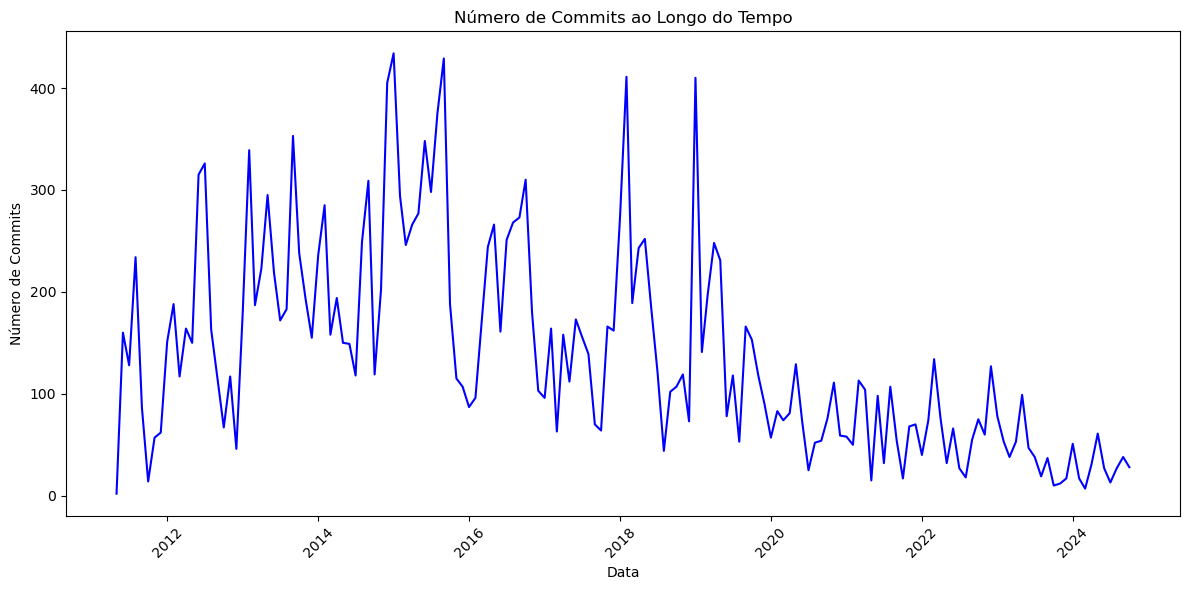

In [3]:
# Converter a coluna de data para datetime com timezone UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Remover linhas onde a conversão falhou (se houver)
df_commits = df_commits.dropna(subset=['author_date'])

# Definir a coluna de data como índice
df_commits.set_index('author_date', inplace=True)

# Agrupar por mês e contar o número de commits
monthly_pull_requests = df_commits.resample('M').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, marker='', color='blue')
plt.title('Número de Commits ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Commits')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


0 valores inválidos em 'author_date'


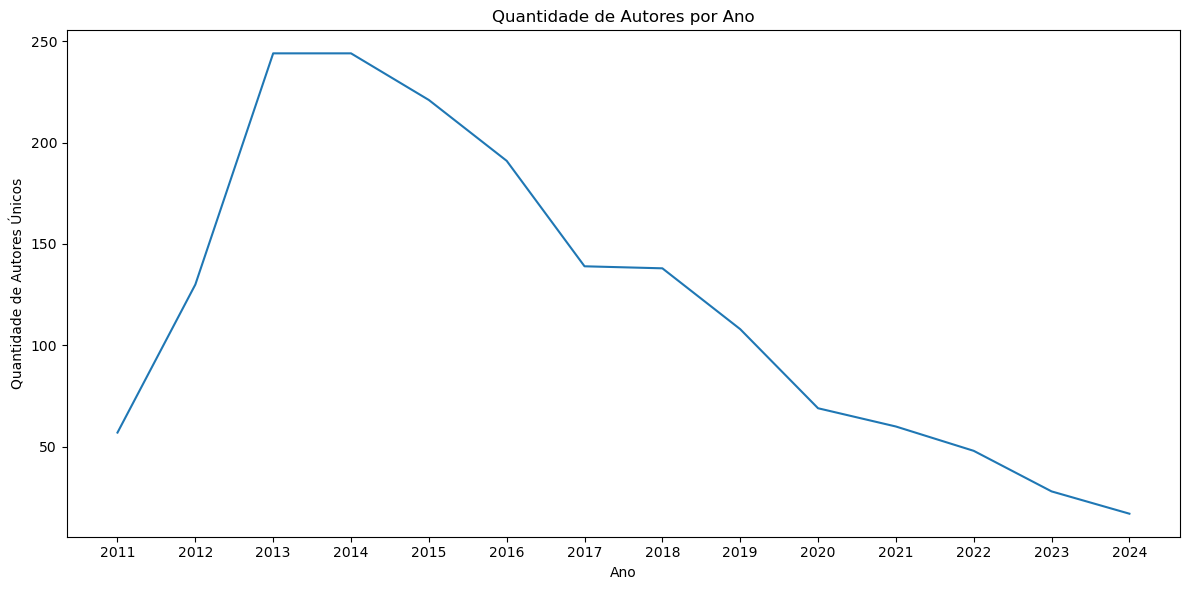

In [4]:
# Converter a coluna 'author_date' para datetime com fuso horário UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['author_date'].isnull().sum(), "valores inválidos em 'author_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['author_date'])

# Extrair o ano da coluna 'author_date'
df_commits['year'] = df_commits['author_date'].dt.year

# Contar o número de autores únicos por ano
authors_per_year = df_commits.groupby('year')['author_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Autores por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Garantir que todos os anos sejam mostrados no eixo X
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()


0 valores inválidos em 'committer_date'


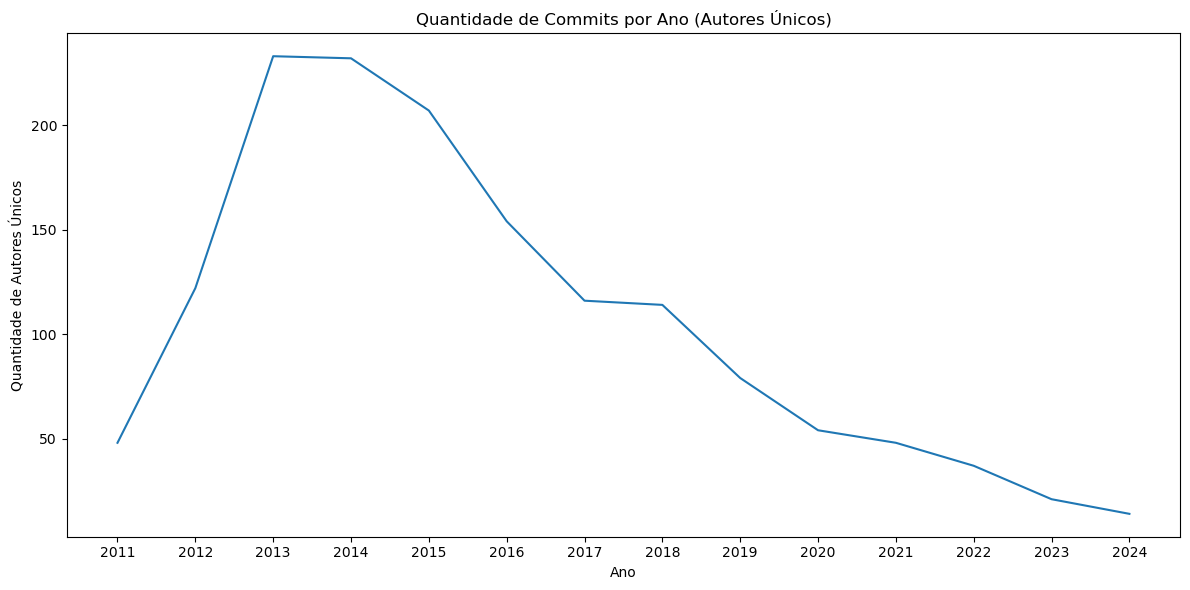

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'committer_date' para datetime com fuso horário UTC
df_commits['committer_date'] = pd.to_datetime(df_commits['committer_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['committer_date'].isnull().sum(), "valores inválidos em 'committer_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['committer_date'])

# Extrair o ano da coluna 'committer_date'
df_commits['year'] = df_commits['committer_date'].dt.year

# Contar o número de autores (committer_email) únicos por ano
authors_per_year = df_commits.groupby('year')['committer_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Commits por Ano (Autores Únicos)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Garantir que todos os anos sejam mostrados no eixo X
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()
